In [1]:
# from keras.datasets import mnist

In [1]:
# (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
import os 
datapath = "../../../datasets"
print(os.path.exists(datapath))

True


In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
train_images = xtrain.reshape((60000, 28, 28, 1))
train_images= xtrain.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = xtest.reshape((10000, 28, 28, 1))
test_images= xtest.astype('float32') / 255

train_labels = to_categorical(ytrain)
test_labels = to_categorical(ytest)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [7]:
from keras import models, layers
import tensorflow as tf

In [8]:
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
model1 = models.Sequential()
model1.add(input_layer)
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
history1 = model1.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 20s 22ms/step - loss: 0.2000 - accuracy: 0.9375 - val_loss: 0.1844 - val_accuracy: 0.9424
Epoch 2/5
782/782 [==============================] - 17s 21ms/step - loss: 0.0516 - accuracy: 0.9835 - val_loss: 0.0566 - val_accuracy: 0.9830
Epoch 3/5
782/782 [==============================] - 16s 21ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0446 - val_accuracy: 0.9881
Epoch 4/5
782/782 [==============================] - 16s 21ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0416 - val_accuracy: 0.9878
Epoch 5/5
782/782 [==============================] - 16s 21ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0488 - val_accuracy: 0.9883


In [11]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0409 - accuracy: 0.9889
Accuracy: 0.9889000058174133
Loss:  0.04093310981988907


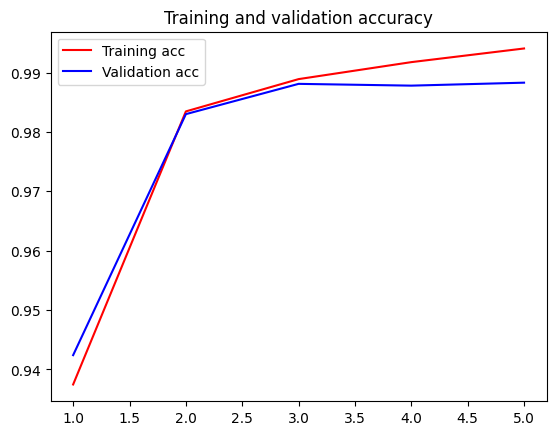

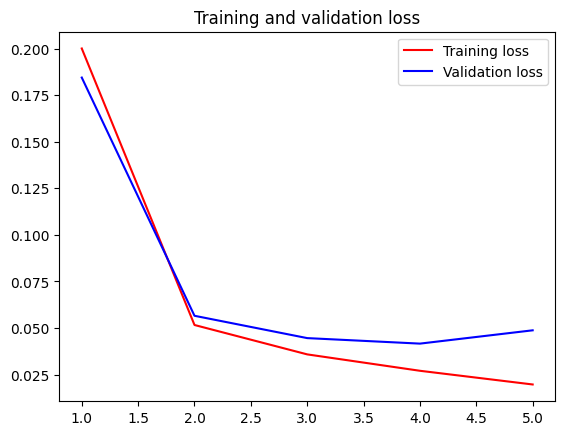

In [12]:
plot_accuracy_and_loss(history1)

#### extract the output from an intermediate layer

In [13]:
image = test_images[1].reshape(1, 28, 28, 1)

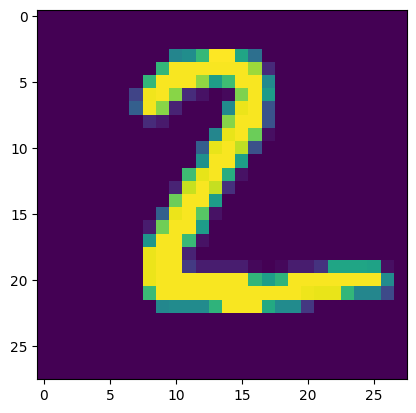

In [14]:
plt.imshow(image.reshape(28, 28))
plt.show()

### [Example of intermediate layer output ](https://androidkt.com/get-output-of-intermediate-layers-keras/)

In [15]:
from keras import Model
layer_name = 'conv2d_2'
data = image
intermediate_layer_model = Model(inputs=model1.input,
                                 outputs=model1.layers[2].output)
intermediate_layer_model.trainable = False

In [16]:
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
Total params: 18,816
Trainable params: 0
Non-trainable params: 18,816
_________________________________________________________________


In [17]:
intermediate_output = intermediate_layer_model.predict(data)
print(intermediate_output.shape)

(1, 11, 11, 64)


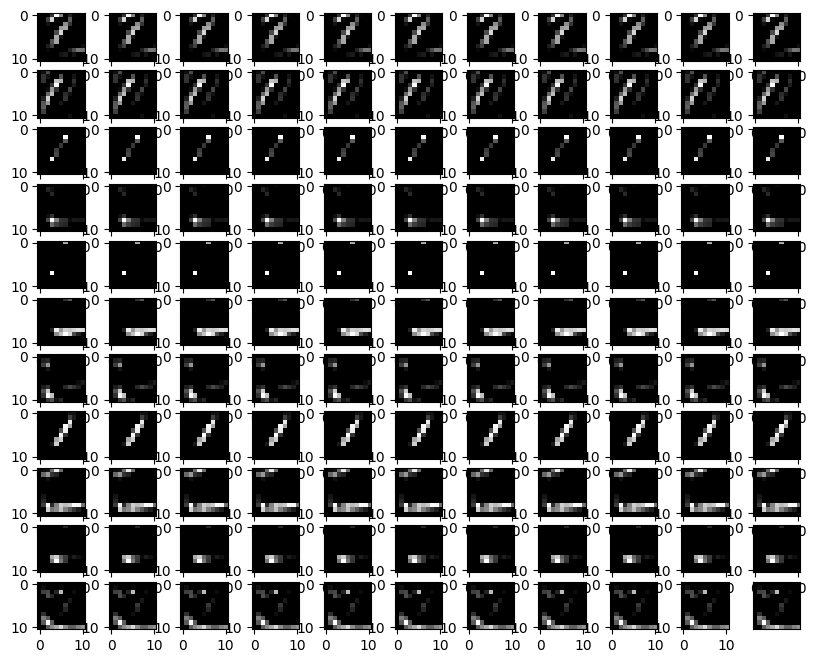

In [18]:
row_size = intermediate_output.shape[1]
col_size = intermediate_output.shape[2]

img_index = 0
fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))
for row in range(0,row_size):
    for col in range(0,col_size):
        ax[row][col].imshow(intermediate_output[0, :, :, img_index], cmap='gray')

    img_index=img_index+1
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
data = image
intermediate_layer_model = Model(inputs=model1.input,
                                 outputs=model1.layers[1].output)
intermediate_layer_model.trainable = False
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [20]:
intermediate_output = intermediate_layer_model.predict(data)
print(intermediate_output.shape)

(1, 13, 13, 32)


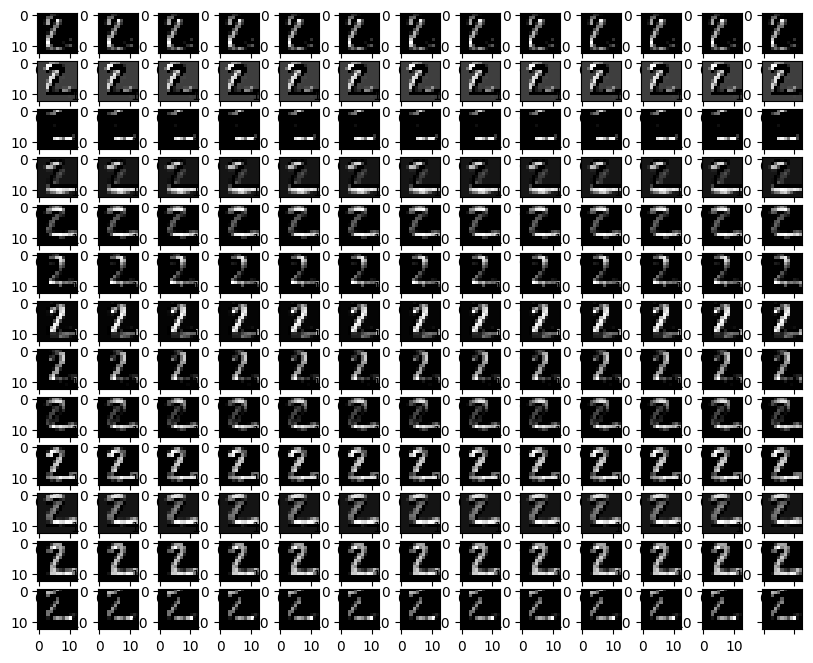

In [22]:
row_size = intermediate_output.shape[1]
col_size = intermediate_output.shape[2]

img_index = 0
fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))
for row in range(0,row_size):
    for col in range(0,col_size):
        ax[row][col].imshow(intermediate_output[0, :, :, img_index], cmap='gray')

    img_index=img_index+1
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

### resource [get output at intermediate layer](https://valueml.com/get-the-output-of-each-layer-in-keras/)